<a href="https://colab.research.google.com/github/nicole-va/TesisPincayVelasquez/blob/main/CodigoTesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPRENSIÓN DE LOS DATOS

In [ ]:
#IGNORAR ABVERTENCIAS
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)


In [ ]:
pip install pandas openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Tender.xlsx'

# Cargar cada hoja en un DataFrame y agregar columna de índice para preservar el orden
releases = pd.read_excel(file_path, sheet_name='Releases').reset_index().rename(columns={'index': 'order_releases'})
planning = pd.read_excel(file_path, sheet_name='Planning').reset_index().rename(columns={'index': 'order_planning'})
tender = pd.read_excel(file_path, sheet_name='Tender').reset_index().rename(columns={'index': 'order_tender'})
awards = pd.read_excel(file_path, sheet_name='Awards').reset_index().rename(columns={'index': 'order_awards'})
awardSuppliers = pd.read_excel(file_path, sheet_name='AwardSuppliers').reset_index().rename(columns={'index': 'order_awardSuppliers'})
contracts = pd.read_excel(file_path, sheet_name='Contracts').reset_index().rename(columns={'index': 'order_contracts'})



# Agrupar por 'ocid' y sumar 'amount' en df4 (Awards)
awards_grouped = awards.groupby('ocid', as_index=False).agg({'amount': 'sum'})

# Unir 'df4_grouped' con el resto del DataFrame 'df4' basado en 'ocid' y borrar las duplicadas
awards_combined = awards.drop(columns='amount').drop_duplicates(subset=['ocid']).merge(awards_grouped, on='ocid', how='inner')

# Eliminar duplicados en df5 y df6 basados en 'ocid'
# Esto asegura que solo haya una fila por 'ocid' en estos DataFrames antes de la unión
awardSuppliers = awardSuppliers.drop_duplicates(subset=['ocid'])
contracts = contracts.drop_duplicates(subset=['ocid'])

In [ ]:
# Combinar df1, df2 y df3
combined_1 = releases.merge(planning, on='ocid', how='outer', suffixes=('_releases', '_planning'))
combined_1 = combined_1.merge(tender, on='ocid', how='outer', suffixes=('', '_tender'))

In [ ]:
# Combinar df4_combined y df5
combined_2 = awards_combined.merge(awardSuppliers, on='ocid', how='outer', suffixes=('_awards', '_awardSuppliers'))

# Asegurarse de que solo haya una fila por 'ocid' en combined_2
combined_2 = combined_2.drop_duplicates(subset=['ocid'])


In [ ]:
# Fusionar los resultados intermedios y añadir Contracts
final_combined = combined_1.merge(combined_2, on='ocid', how='outer')
final_combined = final_combined.merge(contracts, on='ocid', how='outer', suffixes=('', '_contracts'))

# Ordenar el DataFrame final basado en el orden original de los DataFrames
final_combined = final_combined.sort_values(by=['order_releases', 'order_planning', 'order_tender', 'order_awards', 'order_awardSuppliers', 'order_contracts'], na_position='last')

# Eliminar las columnas de orden antes de guardar
final_combined = final_combined.drop(columns=['order_releases', 'order_planning', 'order_tender', 'order_awards', 'order_awardSuppliers', 'order_contracts'])

# Guardar el dataframe combinado en un nuevo archivo Excel
output_path = 'TenderCombinado.xlsx'
final_combined.to_excel(output_path, index=False)

print(f"El archivo combinado ha sido guardado en {output_path}")

El archivo combinado ha sido guardado en TenderCombinado.xlsx


Volumen de data

In [ ]:
#Datos recolectados
dfTender = pd.read_excel('TenderDatosRecolectados.xlsx')
dfTender.shape

(4038, 75)

Tipo de datos y total

In [ ]:
dfTender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ocid                                     4038 non-null   object 
 1   id_releases                              4038 non-null   object 
 2   initiationType                           4038 non-null   object 
 3   buyer_id                                 4038 non-null   object 
 4   buyer_name                               4038 non-null   object 
 5   language                                 4038 non-null   object 
 6   date_x                                   4038 non-null   object 
 7   tag                                      4038 non-null   object 
 8   id_planning                              4038 non-null   object 
 9   rationale                                4038 non-null   object 
 10  budget_id                                4009 no

Calidad de datos

In [ ]:
dfTender.isnull()

,ocid,id_releases,initiationType,buyer_id,buyer_name,language,date_x,tag,id_planning,rationale,...,title,description,status,contractPeriod_startDate_contracts,contractPeriod_endDate_contracts,contractPeriod_durationInDays_contracts,amount_contracts,currency_contracts,dateSigned,ganador
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,True,True,True,True,False
4034,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4035,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4036,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


Descripción de los datos

In [ ]:
dfTender.describe()

,budget_description,budget_amount,value_amount,tenderPeriod_durationInDays,enquiryPeriod_durationInDays,hasEnquiries,awardPeriod_startDate,awardPeriod_durationInDays,numberOfTenderers,title_y,...,correctedValue_currency,enteredValue_amount,enteredValue_currency,contractPeriod_maxExtentDate,contractPeriod_durationInDays,amount,title,description,contractPeriod_durationInDays_contracts,amount_contracts
count,0.0,4.038000e+03,4.038000e+03,4038.000000,4037.000000,3979.0,0.0,0.0,4038.000000,0.0,...,0.0,0.0,0.0,0.0,626.000000,3.861000e+03,0.0,0.0,2757.000000,2.760000e+03
mean,NaN,1.475920e+06,1.475920e+06,20.198118,5.781769,1.0,NaN,NaN,5.270679,NaN,...,NaN,NaN,NaN,NaN,391.742812,1.291603e+06,NaN,NaN,371.979688,1.249064e+06
std,NaN,2.926210e+06,2.926210e+06,7.758516,2.274886,0.0,NaN,NaN,4.951815,NaN,...,NaN,NaN,NaN,NaN,197.895995,2.646296e+06,NaN,NaN,210.979006,3.449833e+06
min,NaN,1.345200e+03,1.345200e+03,3.000000,1.000000,1.0,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,5.000000,7.908100e+02,NaN,NaN,1.000000,5.353000e+01
25%,NaN,3.943305e+04,3.943305e+04,15.000000,5.000000,1.0,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,300.000000,2.791412e+04,NaN,NaN,270.000000,2.367068e+04
50%,NaN,6.247703e+05,6.247703e+05,18.000000,5.000000,1.0,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,365.000000,5.350000e+05,NaN,NaN,365.000000,3.883668e+05
75%,NaN,1.890033e+06,1.890033e+06,24.000000,7.000000,1.0,NaN,NaN,7.000000,NaN,...,NaN,NaN,NaN,NaN,366.000000,1.699222e+06,NaN,NaN,365.000000,1.528696e+06
max,NaN,9.913644e+07,9.913644e+07,263.000000,43.000000,1.0,NaN,NaN,32.000000,NaN,...,NaN,NaN,NaN,NaN,1445.000000,9.860000e+07,NaN,NaN,3651.000000,1.044591e+08


In [ ]:
print(dfTender.columns)

Index(['ocid', 'id_releases', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date_x', 'tag', 'id_planning', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'release_id',
       'id', 'title_x', 'description_x', 'status_x', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'release_id_awards', 'id_awards', 'title_y',
       'description_y', 'status_y', 

Exploración de los datos

<ipython-input-61-93c7dfc7e594>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=budget_amount_counts.values, y=budget_amount_counts.index, palette='light:#5A9_r')


Text(0.5, 1.0, 'Presupuesto de las Entidades Contratantes (intervalos de 500k)')

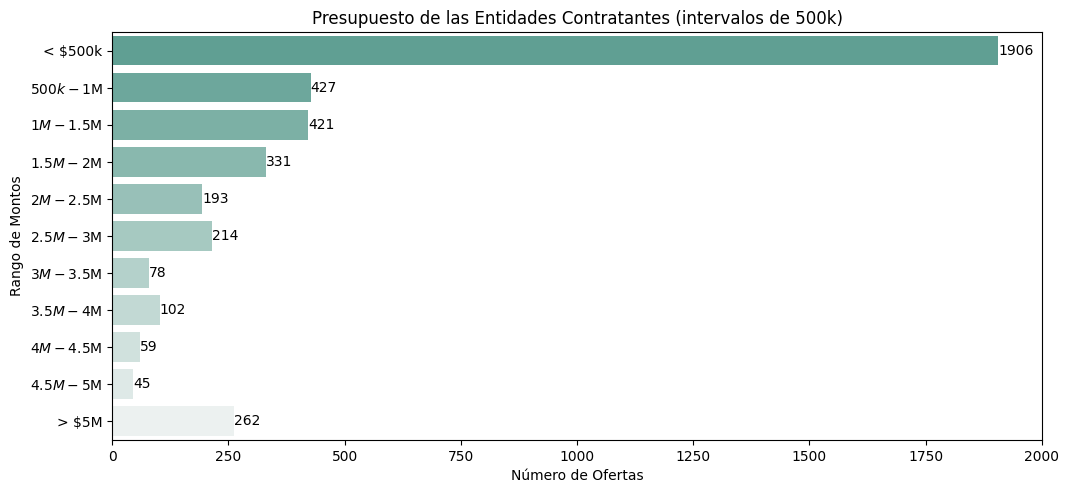

In [ ]:
# Definir los intervalos para los rangos de montos (intervalos de 500k hasta 7 millones)
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, float('inf')]
labels = ['< $500k', '$500k - $1M', '$1M - $1.5M', '$1.5M - $2M', '$2M - $2.5M', '$2.5M - $3M', '$3M - $3.5M', '$3.5M - $4M', '$4M - $4.5M', '$4.5M - $5M', '> $5M']

# Contar el número de ocurrencias en cada intervalo sin crear explícitamente una columna adicional para budget_amount
budget_amount_counts = pd.cut(dfTender['budget_amount'], bins=bins, labels=labels).value_counts().reindex(labels)

# Contar el número de ocurrencias en cada intervalo sin crear explícitamente una columna adicional para amount
amount_counts = pd.cut(dfTender['amount'], bins=bins, labels=labels).value_counts().reindex(labels)

# Crear la figura con subplots
plt.figure(figsize=(12, 18))

# Crear el gráfico de barras para budget_amount
plt.subplot(3, 1, 1)
sns.barplot(x=budget_amount_counts.values, y=budget_amount_counts.index, palette='light:#5A9_r')
for index, value in enumerate(budget_amount_counts.values):
    plt.text(value, index, str(value), va='center')
plt.xlabel('Número de Ofertas')
plt.ylabel('Rango de Montos')
plt.title('Presupuesto de las Entidades Contratantes (intervalos de 500k)')



<ipython-input-62-22af31a212cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='light:#5A9_r')


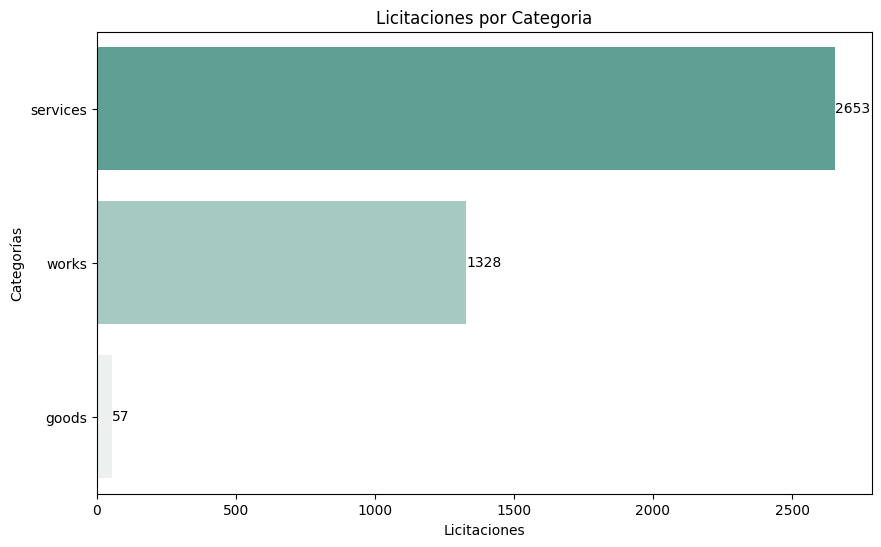

In [ ]:
# Contar el número de ocurrencias en cada categoría de la columna mainProcurementCategory
category_counts = dfTender['mainProcurementCategory'].value_counts()

# Crear el gráfico de barras para mainProcurementCategory
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='light:#5A9_r')

# Agregar etiquetas personalizadas a las barras
for index, value in enumerate(category_counts.values):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Licitaciones')
plt.ylabel('Categorías')
plt.title('Licitaciones por Categoria')
plt.show()

<ipython-input-63-8034ea42d4d7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=criteria_df['Count'], y=criteria_df['Criteria'], palette='light:#5A9_r')


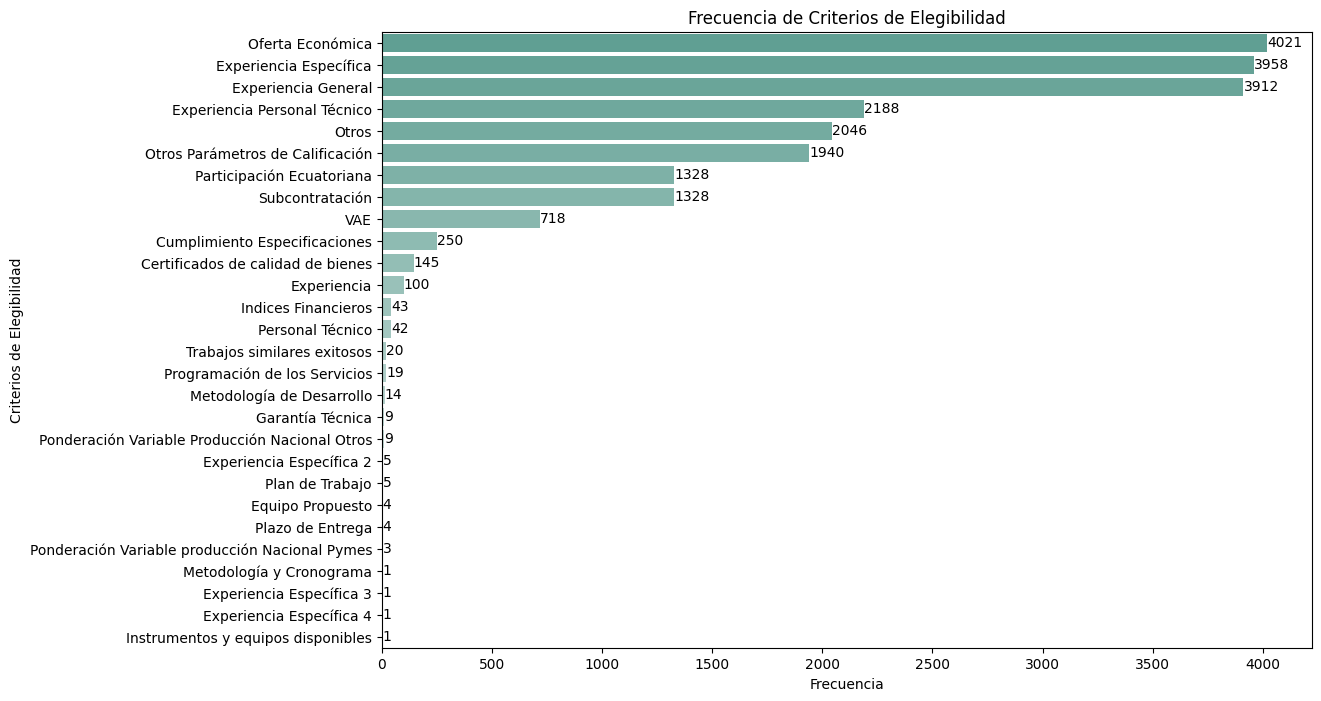

In [ ]:
from collections import Counter

# Dividir los criterios y contar la frecuencia de cada uno
criteria_list = dfTender['eligibilityCriteria'].dropna().str.split(',').tolist()
flat_criteria_list = [item.strip() for sublist in criteria_list for item in sublist]
criteria_counts = Counter(flat_criteria_list)

# Convertir los resultados en un DataFrame
criteria_df = pd.DataFrame(criteria_counts.items(), columns=['Criteria', 'Count']).sort_values(by='Count', ascending=False)

# Crear el histograma para eligibilityCriteria
plt.figure(figsize=(12, 8))
sns.barplot(x=criteria_df['Count'], y=criteria_df['Criteria'], palette='light:#5A9_r')

# Agregar etiquetas personalizadas a las barras
for index, value in enumerate(criteria_df['Count']):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Frecuencia')
plt.ylabel('Criterios de Elegibilidad')
plt.title('Frecuencia de Criterios de Elegibilidad')
plt.show()

<ipython-input-64-33d8e010ddf6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenderers_counts.values, y=tenderers_counts.index, palette='light:#5A9_r')


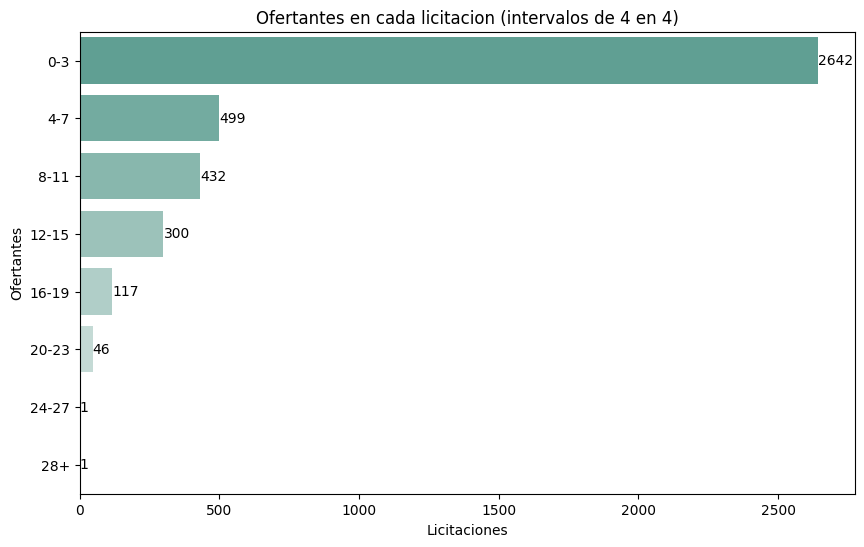

In [ ]:
# Definir los intervalos para los rangos de numberOfTenderers con un intervalo de 4 en 4, considerando que el mayor número es 32
bins = list(range(0, 32, 4)) + [float('inf')]
labels = [f'{i}-{i+3}' for i in range(0, 28, 4)] + ['28+']

# Contar el número de ocurrencias en cada intervalo sin crear explícitamente una columna adicional
tenderers_counts = pd.cut(dfTender['numberOfTenderers'], bins=bins, labels=labels).value_counts().reindex(labels)

# Crear el gráfico de barras con etiquetas personalizadas
plt.figure(figsize=(10, 6))
sns.barplot(x=tenderers_counts.values, y=tenderers_counts.index, palette='light:#5A9_r')

# Agregar etiquetas personalizadas a las barras
for index, value in enumerate(tenderers_counts.values):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Licitaciones')
plt.ylabel('Ofertantes')
plt.title('Ofertantes en cada licitacion (intervalos de 4 en 4)')
plt.show()

<ipython-input-65-2ab0621a137d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=dfTender[feature], order=dfTender[feature].value_counts().index[:16], palette='Set3')


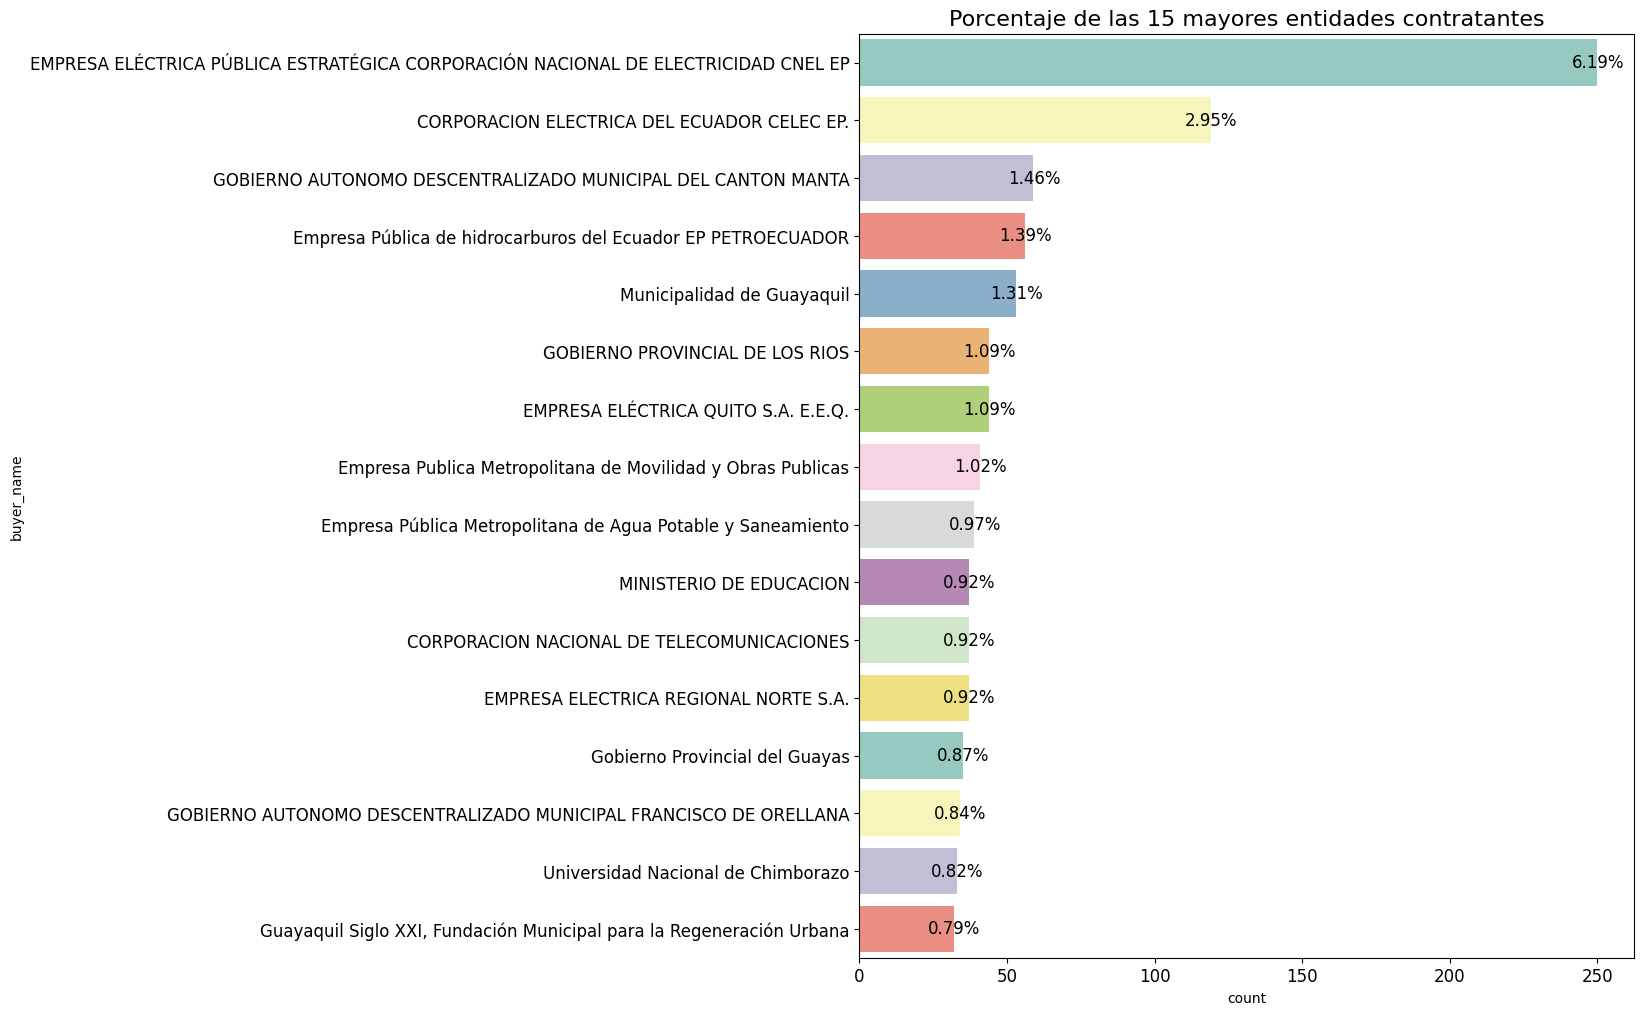

<ipython-input-65-2ab0621a137d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=dfTender[feature], order=dfTender[feature].value_counts().index[:16], palette='Set3')


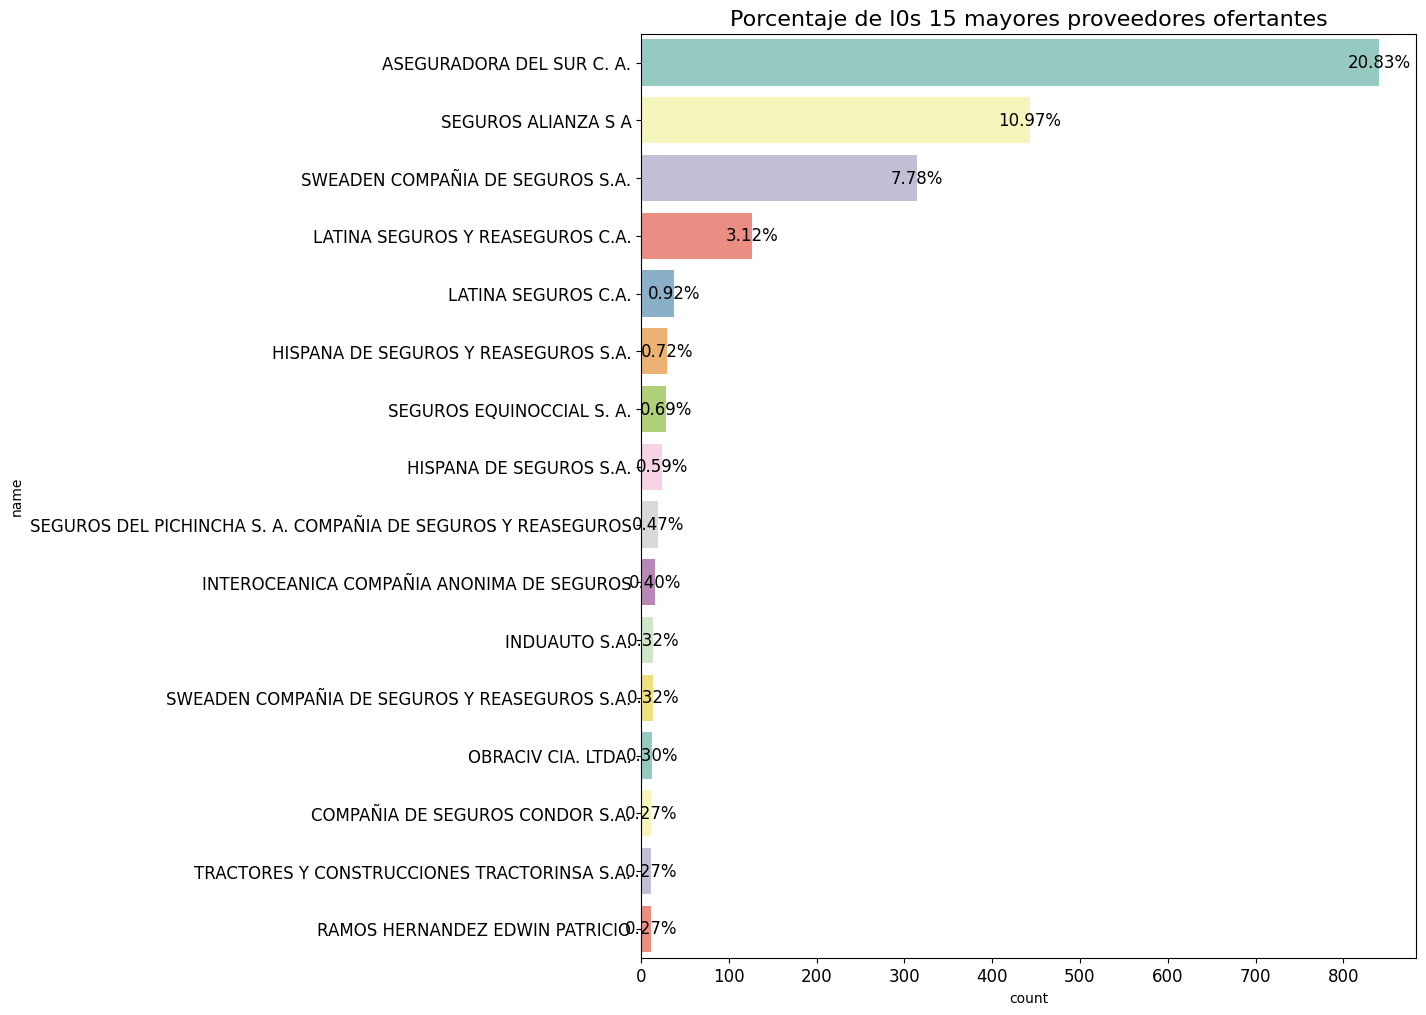

In [ ]:
def plot_count(feature, title, df, size=1):
    # Ajustar el tamaño del gráfico para que sea más alto y menos ancho
    f, ax = plt.subplots(1, 1, figsize=(10, 12))
    total = float(len(df))
    g = sns.countplot(y=dfTender[feature], order=dfTender[feature].value_counts().index[:16], palette='Set3')
    g.set_title("Porcentaje {}".format(title), fontsize=16)  # Tamaño del título
    if size > 2:
        plt.yticks(size=12)  # Tamaño de las etiquetas del eje y
        plt.xticks(size=12)  # Tamaño de las etiquetas del eje x
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.2,
                p.get_y() + p.get_height() / 2,
                '{:1.2f}%'.format(100 * width / total),
                ha="center",
                va="center",
                fontsize=12)  # Tamaño del texto de las etiquetas
    plt.show()

# Crear el gráfico para buyer_name
plot_count("buyer_name", "de las 15 mayores entidades contratantes", dfTender, size=4)

# Crear el gráfico para procuringEntity_name
plot_count("name", "de l0s 15 mayores proveedores ofertantes", dfTender, size=4)

Calidad del conjunto de datos

ocid                                          0
id_releases                                   0
initiationType                                0
buyer_id                                      0
buyer_name                                    0
                                           ... 
contractPeriod_durationInDays_contracts    1281
amount_contracts                           1278
currency_contracts                         1278
dateSigned                                 1278
ganador                                    1501
Length: 75, dtype: int64


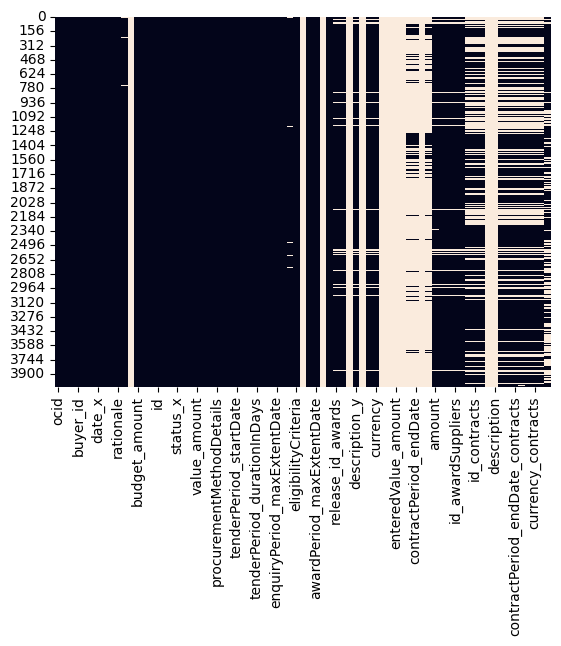

In [ ]:
# Ver valores faltantes
print(dfTender.isnull().sum())

# Visualizar valores faltantes
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dfTender.isnull(), cbar=False)
plt.show()


PREPARACIÓN DE LOS DATOS

Selección de Variables relevantes

In [ ]:
#Seleccion de variables
df= dfTender[['budget_amount','mainProcurementCategory','tenderPeriod_durationInDays','numberOfTenderers','amount','contractPeriod_durationInDays', 'ganador','eligibilityCriteria']]

In [ ]:
# Verificar celdas vacías por columna
celdas_vacias = df.isnull().sum()
print(celdas_vacias)


budget_amount                       0
mainProcurementCategory             0
tenderPeriod_durationInDays         0
numberOfTenderers                   0
amount                            177
contractPeriod_durationInDays    3412
ganador                          1501
eligibilityCriteria                 0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   budget_amount                  4038 non-null   float64
 1   mainProcurementCategory        4038 non-null   object 
 2   tenderPeriod_durationInDays    4038 non-null   int64  
 3   numberOfTenderers              4038 non-null   int64  
 4   amount                         3861 non-null   float64
 5   contractPeriod_durationInDays  626 non-null    float64
 6   ganador                        2537 non-null   object 
 7   eligibilityCriteria            4038 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 252.5+ KB


In [ ]:
# Imputar los valores faltantes con la mediana
df = df.fillna({'contractPeriod_durationInDays': df['contractPeriod_durationInDays'].median()})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   budget_amount                  4038 non-null   float64
 1   mainProcurementCategory        4038 non-null   object 
 2   tenderPeriod_durationInDays    4038 non-null   int64  
 3   numberOfTenderers              4038 non-null   int64  
 4   amount                         3861 non-null   float64
 5   contractPeriod_durationInDays  4038 non-null   float64
 6   ganador                        2537 non-null   object 
 7   eligibilityCriteria            4038 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 252.5+ KB


In [ ]:
# Elimina filas con valores NaN en cualquier columna
df = df.dropna()

In [ ]:
# Verificar celdas vacías por columna
celdas_vacias = df.isnull().sum()
print(celdas_vacias)
cantidad_registros = df.shape[0]
print("Cantidad de registros:", cantidad_registros)

budget_amount                    0
mainProcurementCategory          0
tenderPeriod_durationInDays      0
numberOfTenderers                0
amount                           0
contractPeriod_durationInDays    0
ganador                          0
eligibilityCriteria              0
dtype: int64
Cantidad de registros: 2536


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 0 to 4037
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   budget_amount                  2536 non-null   float64
 1   mainProcurementCategory        2536 non-null   object 
 2   tenderPeriod_durationInDays    2536 non-null   int64  
 3   numberOfTenderers              2536 non-null   int64  
 4   amount                         2536 non-null   float64
 5   contractPeriod_durationInDays  2536 non-null   float64
 6   ganador                        2536 non-null   object 
 7   eligibilityCriteria            2536 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 178.3+ KB


In [ ]:
# Crear una lista para almacenar todas las palabras de eligibilityCriteria
all_criteria = []

# Recorrer cada fila de la columna 'eligibilityCriteria' y dividir por comas
for criteria in df['eligibilityCriteria']:
    # Dividir los criterios por coma y agregar a la lista
    all_criteria.extend(criteria.split(','))

# Crear un DataFrame temporal para contar la frecuencia de cada criterio
criteria_counts = pd.Series(all_criteria).value_counts()

# Para ver los resultados en una tabla visual
criteria_counts_df = criteria_counts.reset_index().rename(columns={'index': 'Criteria', 0: 'Count'})
criteria_counts_df.head(10)  # Mostrar los 10 criterios más comunes

,Criteria,count
0,Oferta Económica,2529
1,Experiencia Específica,2496
2,Experiencia General,2467
3,Experiencia Personal Técnico,1500
4,Otros,1437
5,Otros Parámetros de Calificación,1073
6,Participación Ecuatoriana,916
7,Subcontratación,916
8,VAE,521
9,Cumplimiento Especificaciones,138


In [ ]:
# Asegurarse de que todos los valores en la columna 'eligibilityCriteria' son cadenas de texto
df['eligibilityCriteria'] = df['eligibilityCriteria'].astype(str)

# Reemplazar "Otros Parámetros de Calificación" por "Otros"
df['eligibilityCriteria'] = df['eligibilityCriteria'].str.replace('Otros Parámetros de Calificación', 'Otros')

# Definir los parámetros específicos
specific_parameters = [
    'Oferta Económica',
    'Experiencia Específica',
    'Experiencia General',
    'Experiencia Personal Técnico',
    'Otros',
    'Participación Ecuatoriana',
    'VAE'
]

# Crear columnas binarias para cada criterio específico
for criterion in specific_parameters:
    df[criterion] = df['eligibilityCriteria'].apply(lambda x: 1 if criterion in x else 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una función para aplicar LabelEncoder a cada columna categórica y reemplazar las originales
def encode_labels(df, columns):
    label_encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Especificar las columnas que deseas codificar
columns_to_encode = ['mainProcurementCategory', 'ganador']

# Aplicar la codificación
df_encoded, encoders = encode_labels(df, columns_to_encode)

# Eliminar la columna eligibilityCriteria
df = df.drop('eligibilityCriteria', axis=1)

# Mostrar el mapeo de categorías a números para cada columna codificada
print("\nCategorías codificadas:")
for column, encoder in encoders.items():
    print(f"\nCategorías codificadas para '{column}':")
    for i, category in enumerate(encoder.classes_):
        print(f"{category} -> {i}")


Categorías codificadas:

Categorías codificadas para 'mainProcurementCategory':
goods -> 0
services -> 1
works -> 2

Categorías codificadas para 'ganador':
no -> 0
si -> 1


In [ ]:
#Cambiar nombre columnas

df.rename(columns={
    'budget_amount': 'Presupuesto',
    'mainProcurementCategory': 'CategoriaPrincipal',
    'tenderPeriod_durationInDays': 'DuracionLicitacionDias',
    'numberOfTenderers': 'NumeroOferentes',
    'amount': 'MontoOfertado',
    'contractPeriod_durationInDays': 'DuracionContratoDias',
    'ganador': 'Ganador',
    'Oferta Económica': 'OfertaEconomica',
    'Experiencia Específica': 'ExperienciaEspecifica',
    'Experiencia General': 'ExperienciaGeneral',
    'Experiencia Personal Técnico': 'ExperienciaPersonalTecnico',
    'Otros': 'Otros parametros de calificacion',
    'Participación Ecuatoriana': 'ParticipacionEcuatoriana',
    'VAE': 'ValorAgregadoEcuatoriano'
}, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 0 to 4037
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Presupuesto                       2536 non-null   float64
 1   CategoriaPrincipal                2536 non-null   int64  
 2   DuracionLicitacionDias            2536 non-null   int64  
 3   NumeroOferentes                   2536 non-null   int64  
 4   MontoOfertado                     2536 non-null   float64
 5   DuracionContratoDias              2536 non-null   float64
 6   Ganador                           2536 non-null   int64  
 7   OfertaEconomica                   2536 non-null   int64  
 8   ExperienciaEspecifica             2536 non-null   int64  
 9   ExperienciaGeneral                2536 non-null   int64  
 10  ExperienciaPersonalTecnico        2536 non-null   int64  
 11  Otros parametros de calificacion  2536 non-null   int64  
 12  Participaci

In [ ]:
df = df.reset_index(drop=True)


<Axes: >

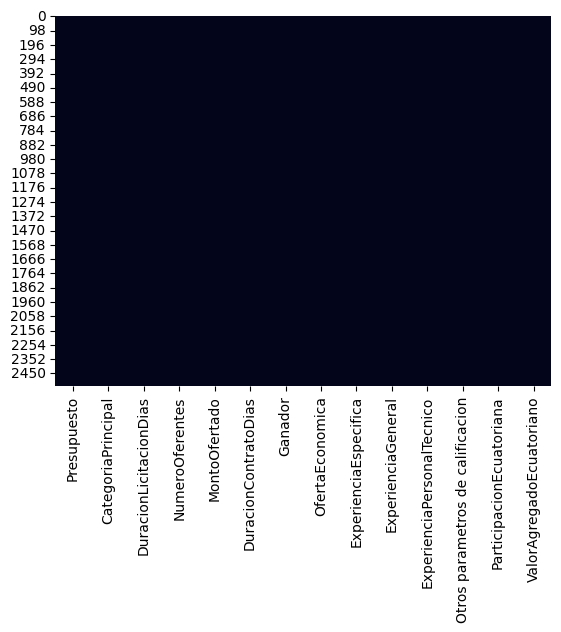

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

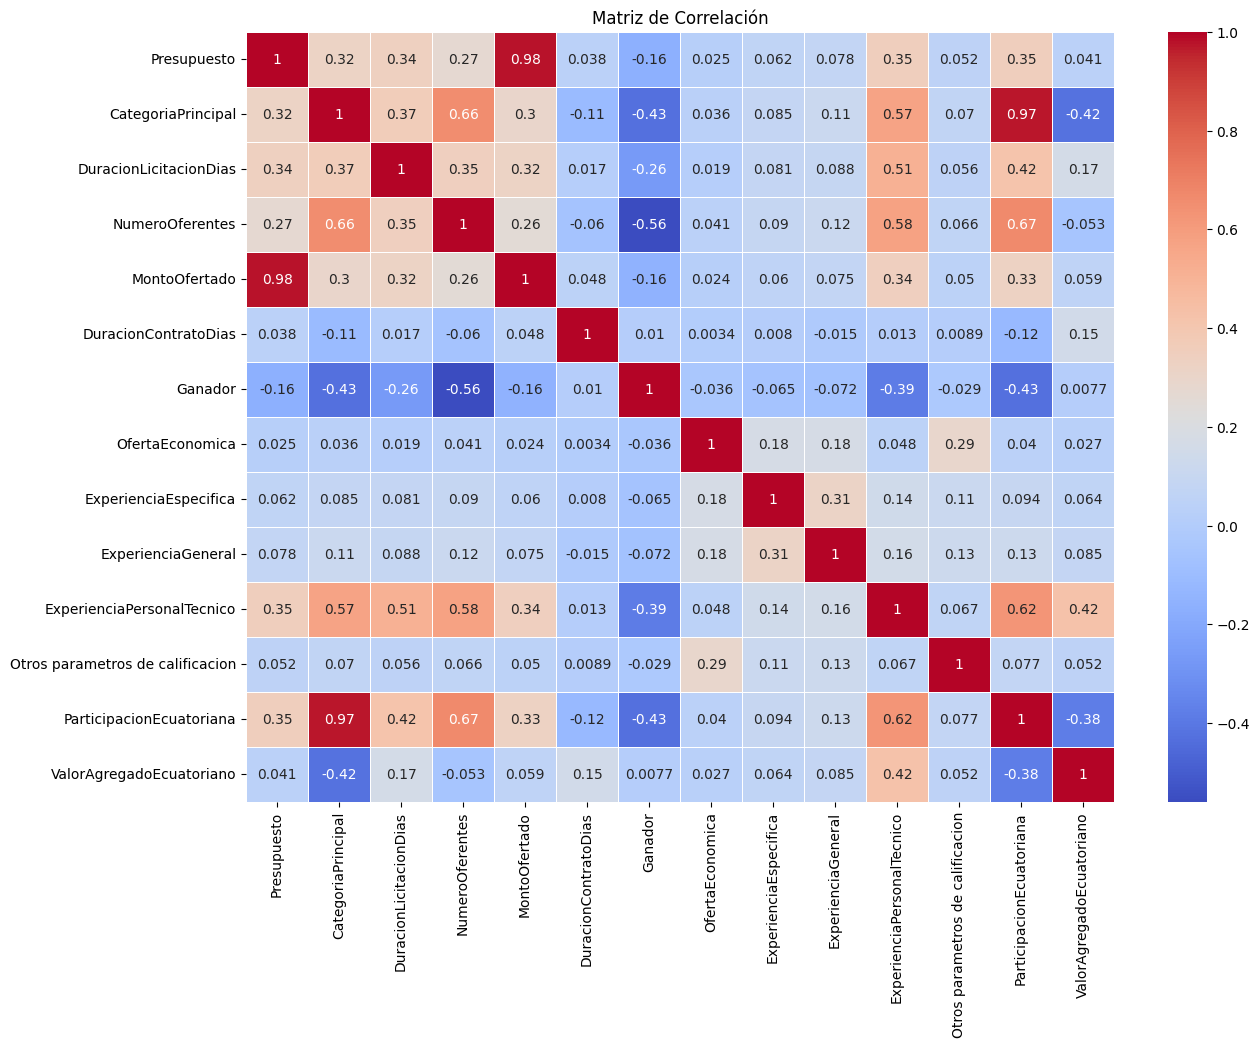

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 10))  # Puedes ajustar el tamaño de la figura según tus necesidades

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

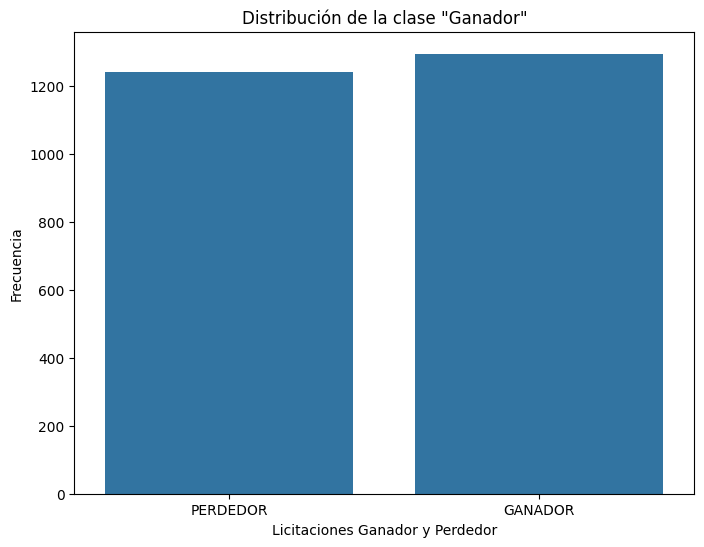

Distribución de la clase 'ganador':
Ganador
1    1295
0    1241
Name: count, dtype: int64


In [ ]:
# Ver la distribución de la clase "ganador"
plt.figure(figsize=(8, 6))
sns.countplot(x='Ganador', data=df)
plt.title('Distribución de la clase "Ganador"')
plt.xlabel('Licitaciones Ganador y Perdedor')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['PERDEDOR', 'GANADOR'])
plt.show()

# Mostrar la distribución de la clase "ganador" en números
print("Distribución de la clase 'ganador':")
print(df['Ganador'].value_counts())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Presupuesto                       2536 non-null   float64
 1   CategoriaPrincipal                2536 non-null   int64  
 2   DuracionLicitacionDias            2536 non-null   int64  
 3   NumeroOferentes                   2536 non-null   int64  
 4   MontoOfertado                     2536 non-null   float64
 5   DuracionContratoDias              2536 non-null   float64
 6   Ganador                           2536 non-null   int64  
 7   OfertaEconomica                   2536 non-null   int64  
 8   ExperienciaEspecifica             2536 non-null   int64  
 9   ExperienciaGeneral                2536 non-null   int64  
 10  ExperienciaPersonalTecnico        2536 non-null   int64  
 11  Otros parametros de calificacion  2536 non-null   int64  
 12  Partic

In [ ]:

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Crear el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=2021)

# Ajustar el modelo
iso_forest.fit(df)

# Realizar predicciones
y_pred = iso_forest.predict(df)

# Filtrar outliers
df = df[y_pred == 1]

# Mostrar el número de registros después de eliminar outliers
print("Cantidad de registros:", df.shape[0])


Cantidad de registros: 2485


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Presupuesto                       2485 non-null   float64
 1   CategoriaPrincipal                2485 non-null   int64  
 2   DuracionLicitacionDias            2485 non-null   int64  
 3   NumeroOferentes                   2485 non-null   int64  
 4   MontoOfertado                     2485 non-null   float64
 5   DuracionContratoDias              2485 non-null   float64
 6   Ganador                           2485 non-null   int64  
 7   OfertaEconomica                   2485 non-null   int64  
 8   ExperienciaEspecifica             2485 non-null   int64  
 9   ExperienciaGeneral                2485 non-null   int64  
 10  ExperienciaPersonalTecnico        2485 non-null   int64  
 11  Otros parametros de calificacion  2485 non-null   int64  
 12  Participaci

MODELADO

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# División de datos en entrenamiento y prueba
dfModelado = df[['NumeroOferentes', 'CategoriaPrincipal', 'Presupuesto', 'MontoOfertado', 'Ganador', 'DuracionLicitacionDias', 'DuracionContratoDias']]

X = dfModelado.drop('Ganador', axis=1)
y = dfModelado['Ganador']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Crear y entrenar el clasificador AdaBoost
ada_boost = AdaBoostClassifier(random_state=2021)
ada_boost.fit(X_train, y_train)

# Realizar predicciones
y_pred_ada_boost = ada_boost.predict(X_test)

# Evaluar el modelo
print(f"AdaBoost F1 Score: {f1_score(y_test, y_pred_ada_boost, average='macro'):.4f}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada_boost):.4f}")

AdaBoost F1 Score: 0.7851
AdaBoost Accuracy: 0.7855


In [ ]:
pip install catboost


In [ ]:
from catboost import CatBoostClassifier

# Crear el clasificador CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Ajustar el modelo
catboost_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_catboost = catboost_model.predict(X_test)

# Evaluar el modelo
print(f"CatBoost F1 Score: {f1_score(y_test, y_pred_catboost, average='macro'):.4f}")
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_catboost):.4f}")


CatBoost F1 Score: 0.8043
CatBoost Accuracy: 0.8056


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el clasificador
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest F1 Score: 0.6741
Random Forest Accuracy: 0.6743


EVALUACION

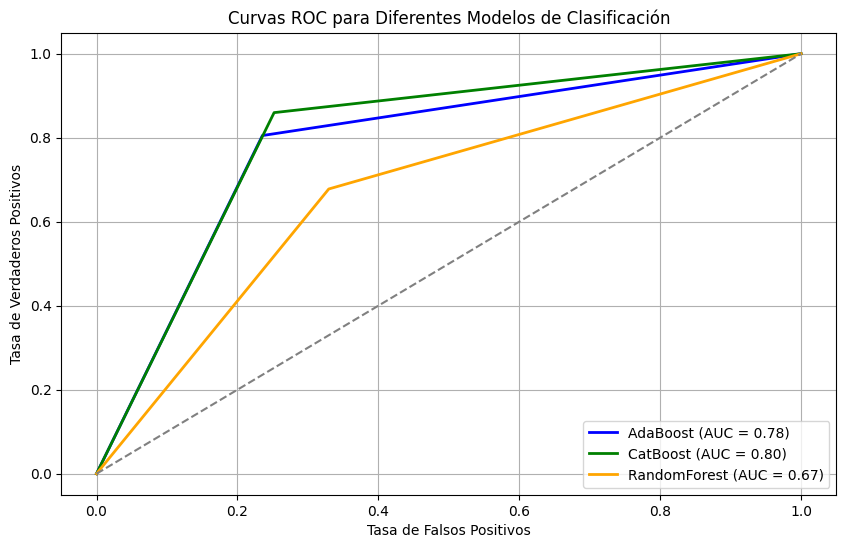

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC para cada modelo
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada_boost)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_catboost)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

roc_auc_ada = auc(fpr_ada, tpr_ada)
roc_auc_cat = auc(fpr_cat, tpr_cat)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_ada))
plt.plot(fpr_cat, tpr_cat, color='green', lw=2, label='CatBoost (AUC = {:.2f})'.format(roc_auc_cat))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='RandomForest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Diferentes Modelos de Clasificación')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar gráfico
plt.show()

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       361
           1       0.78      0.86      0.82       385

    accuracy                           0.81       746
   macro avg       0.81      0.80      0.80       746
weighted avg       0.81      0.81      0.80       746



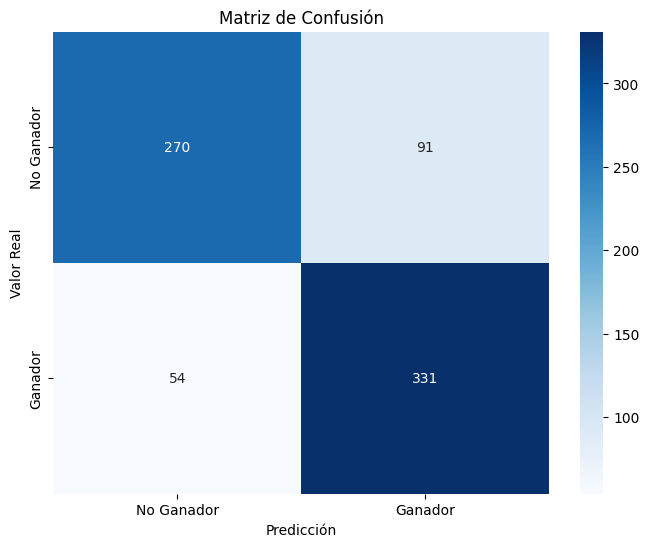

In [ ]:
# Evaluación del modelo
# Reporte de clasificación
report = classification_report(y_test, y_pred_catboost)
print("Reporte de Clasificación:")
print(report)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_catboost)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ganador', 'Ganador'],  # Etiquetas de las clases en el eje x
            yticklabels=['No Ganador', 'Ganador'])  # Etiquetas de las clases en el eje y
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       361
           1       0.69      0.68      0.68       385

    accuracy                           0.67       746
   macro avg       0.67      0.67      0.67       746
weighted avg       0.67      0.67      0.67       746



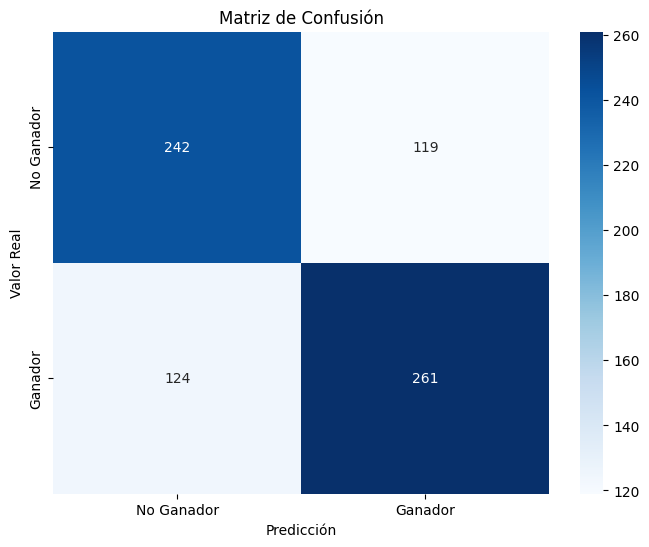

In [ ]:
# Evaluación del modelo
# Reporte de clasificación
report = classification_report(y_test, y_pred_rf)
print("Reporte de Clasificación:")
print(report)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ganador', 'Ganador'],  # Etiquetas de las clases en el eje x
            yticklabels=['No Ganador', 'Ganador'])  # Etiquetas de las clases en el eje y
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       361
           1       0.78      0.81      0.79       385

    accuracy                           0.79       746
   macro avg       0.79      0.78      0.79       746
weighted avg       0.79      0.79      0.79       746



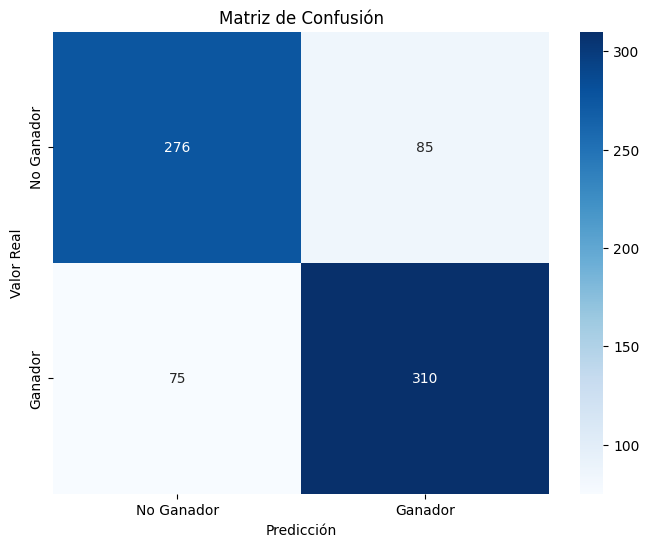

In [ ]:
# Evaluación del modelo
# Reporte de clasificación
report = classification_report(y_test, y_pred_ada_boost)
print("Reporte de Clasificación:")
print(report)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_ada_boost)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ganador', 'Ganador'],  # Etiquetas de las clases en el eje x
            yticklabels=['No Ganador', 'Ganador'])  # Etiquetas de las clases en el eje y
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

XAI

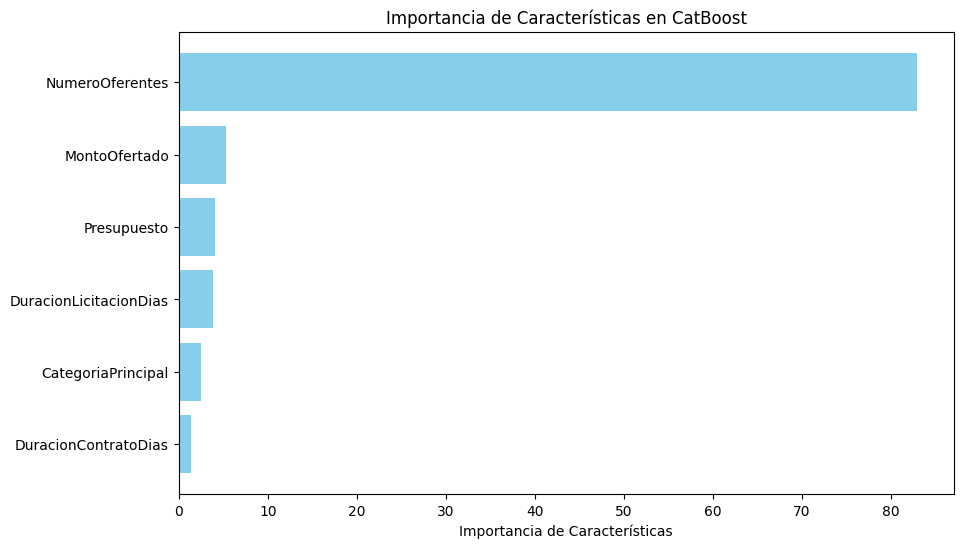

In [ ]:
#Feature Importance
# Obtener la importancia de las características
feature_importances = catboost_model.get_feature_importance()
feature_names = X_train.columns

# Ordenar las características por su importancia de mayor a menor
indices = np.argsort(feature_importances)[::-1]  # Ordenar en orden descendente

# Reordenar las características y sus importancias
sorted_feature_names = feature_names[indices]
sorted_feature_importances = feature_importances[indices]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel("Importancia de Características")
plt.title("Importancia de Características en CatBoost")
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.show()

In [ ]:
pip install shap


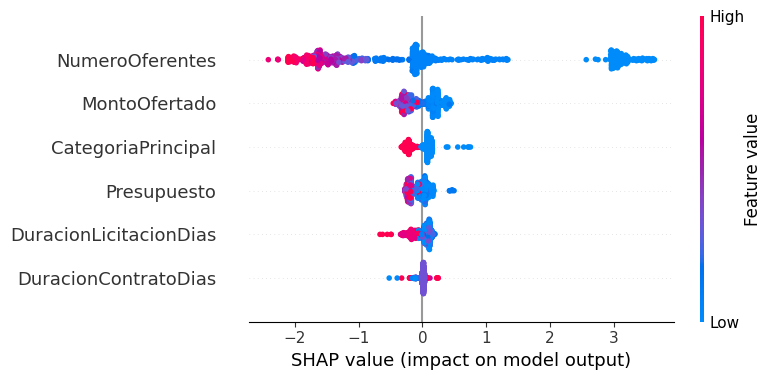

In [ ]:
import shap

# Crear un objeto de SHAP explainer
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


DESPLIEGUE

In [ ]:
# Guardar el modelo en un archivo .cbm
catboost_model.save_model('modelo_entrenado.cbm')